#MCI AI and Machine Learning For Begineer - Topic: Comparison/Classification --Le Duyc Anh - 4/6/2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. K-means Clustering

in K-clustering algroithm, we have various of clusters of data that we have no labels for each data. To put it simply, the goals of utilizing K-means Clustering is to devide and classify data into different clusters, as the data in a clusters has a specific closeness.
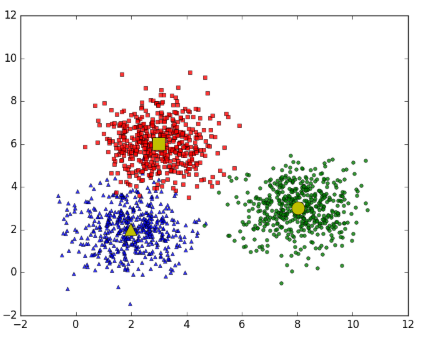

The main ideas of clustering is to aggregate the points that sits next to each others in a specific space. (this space can have various dimensions of circumstances and informations about a incredibly huge datasets)

from the previous example, it shows an example of a 3 clusters of data.

given that every clusters has a representative point, a center (indicating in yellow). And the points around each centers related to the same group with those center.

Basically, set a center point, and we see if random other points are really close to it or not

For instance, if we got 5 islands on a area of water, as the center, and a random ass points inside the Oxy table, it will calculated the distance of each points and then will follow the smallest distance.

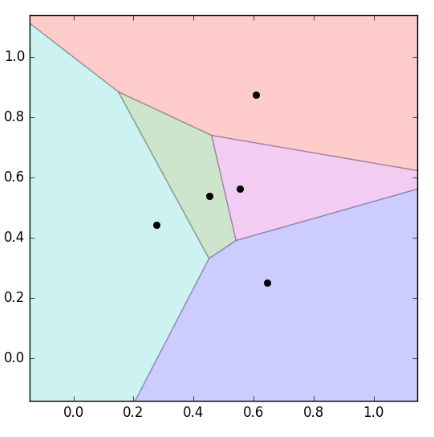

in mathematics, this is called the Voronoi Diagram, which is a partition of a plain into regions CLOSE TO EACH OF A GIVEN SET OF OBJECT.

For 3 or more dimensions, like for planets, each planets will be considered as each points. Or it also can be called as: HYPERPOLYGON


Statistically thinking, so how can i indicate which points it should follows, basically for each random ass $x_i$ have $y_i = [ y_{i1},y_{i1},y_{i2},...,y_{iK}]∈
R^{ d × K}$ as the label vector, each $Y_i$ indicates each center points, with K is the amount of clusters/center points we want to enumerate.

when $x_i$ follows the cluster 1, the rest is = 0 but $y_{i1}$, so do when it follows the clusters 2, and so on, applying for each points



##Mathematical Theories

<h1>Loss Function and Optimization Problem</h1>

If we consider **mₖ** as the center (or representative) of each cluster and _assume_ that all data points are assigned to a cluster by **mₖ**, then the error for assigning a data point **xᵢ** to cluster **k** is the distance:


***disclaimer***

### Are $\mathbf{x}$ and $\mathbf{m}$ Just on the $x$-Axis (Ox Line)?

No — in the context of K-means clustering, both $\mathbf{x}$ and $\mathbf{m}$ are **vectors**, not just scalar values on the $x$-axis.

---

#### Specifically:

- $\mathbf{x}_i \in \mathbb{R}^d$ is a **data point vector**.  
  Example: If $d = 2$, then $\mathbf{x}_i = (x_i^{(1)}, x_i^{(2)}) = (x, y)$

- $\mathbf{m}_k \in \mathbb{R}^d$ is the **cluster center vector** for cluster $k$, same dimension as $\mathbf{x}_i$.

---

#### Example in 2D:

If your data is in 2D space, then:

- $\mathbf{x}_i = (x_i^{(1)}, x_i^{(2)})$
- $\mathbf{m}_k = (m_k^{(1)}, m_k^{(2)})$

Then the squared Euclidean distance is:

$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2 = (x_i^{(1)} - m_k^{(1)})^2 + (x_i^{(2)} - m_k^{(2)})^2
$$

So this measures the **full geometric distance** between a data point and a cluster center in $d$-dimensional space — **not** just along the $x$-axis.



$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2
$$

We want this error to be as small as possible, so we aim to minimize the following quantity:

$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2
$$

Moreover, since **xᵢ** is assigned to cluster **k**, we have:

$$
y_{ik} = 1, \quad y_{ij} = 0, \quad \forall j \ne k
$$

Then, the expression above can be rewritten as:

$$
y_{ik} \| \mathbf{x}_i - \mathbf{m}_k \|_2^2 = \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2
$$


The total loss for the dataset becomes:

$$
\mathcal{L}(\mathbf{Y}, \mathbf{M}) = \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2
$$

Where:

- **Y** = [ **y₁**, **y₂**, ..., **yₙ** ] is the label matrix.

In K-means, we assign each data point $x_i$ to one of 𝐾 clusters. Instead of just writing “this point belongs to cluster 2,” we often represent the assignment using a label matrix 𝑌.

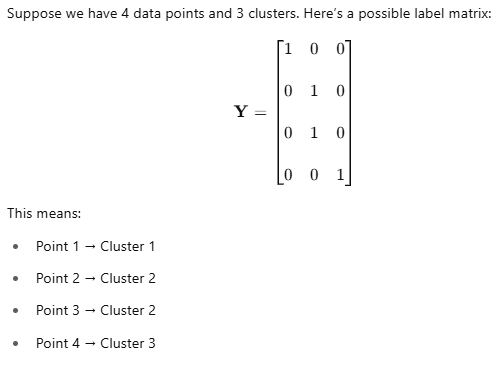

- **M** = [ **m₁**, **m₂**, ..., **mₖ** ] are the cluster centers.

This is the **loss function** in the K-means clustering problem: $\mathcal{L}(\mathbf{Y}, \mathbf{M})$ with the constraint described in equation (1).

To summarize, the optimization problem is:

$$
\mathbf{Y}, \mathbf{M} = \arg \min_{\mathbf{Y}, \mathbf{M}} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

subject to:

$$
y_{ij} \in \{0, 1\} \quad \forall i, j; \quad \sum_{j=1}^{K} y_{ij} = 1 \quad \forall i
$$


<h1> Found $Y$, find $M$ </h1>
Thus, for instance, when we have found all of the centers, which the M has been found, to find y, or find all the label vectors to let the loss function to reach its minimum solution

$$
\mathbf{y_i} = \arg \min_{\mathbf{{y_j}}} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

<h1>Found $M$, Find $Y$</h1>
when we have found the cluster for each points, find the new center for each clusters to make the loss function to be the smallest.

$$
m_j = \arg \min_{{m_j}} \sum_{t=1}^{N} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

Đặt \( l(\mathbf{m}_j) \) là hàm bên trong dấu \( \arg\min \), ta có đạo hàm:

$$
\frac{\partial l(\mathbf{m}_j)}{\partial \mathbf{m}_j} = 2 \sum_{i=1}^{N} y_{ij}(\mathbf{m}_j - \mathbf{x}_i)
$$

Giải phương trình đạo hàm bằng 0 ta có:

$$
\mathbf{m}_j \sum_{i=1}^{N} y_{ij} = \sum_{i=1}^{N} y_{ij} \mathbf{x}_i
$$

$$
\Rightarrow \mathbf{m}_j = \frac{\sum_{i=1}^{N} y_{ij} \mathbf{x}_i}{\sum_{i=1}^{N} y_{ij}}
$$



##K-mean Clustering Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn.cluster as cluster

[[-4.96938657  3.53724005]
 [-4.81246011  5.14500747]
 [-5.02457784  3.16461048]
 [ 6.42385686 -3.54076191]
 [-6.62888728  2.31853249]] [2 2 2 1 2]


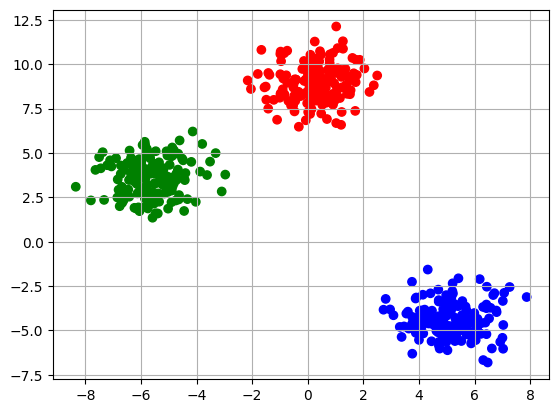

In [ ]:
x,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

print(x[:5],y[:5])

fig = plt.figure(0)
plt.grid(True)
from matplotlib.colors import ListedColormap
plt.scatter(x[:,0],x[:,1], c=y, cmap = ListedColormap(["red", "blue", "green"]))
plt.show()

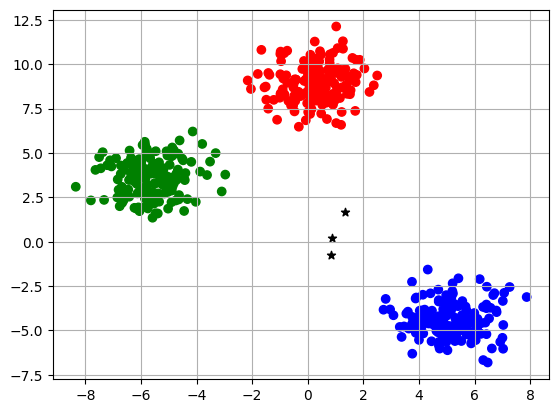

In [ ]:

clusters = {}
k=3
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

plt.scatter(x[:,0],x[:,1], c=y, cmap = ListedColormap(["red", "blue", "green"]))
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'black')
plt.show()

#this is basically creates a random 3 points

In [ ]:
def distance(x_1, m_1):
  return np.sqrt(np.sum((x_1 - m_1)**2)) #Defining Euclidean distance


In [ ]:
clusters

{0: {'center': array([ 0.82512662, -0.74675819]), 'points': []},
 1: {'center': array([0.86376802, 0.18772437]), 'points': []},
 2: {'center': array([1.33714259, 1.6846017 ]), 'points': []}}

In [ ]:
def assign_clusters(X, clusters):
    for index_per_x_points in range(X.shape[0]):
        dist = []

        curr_x = X[index_per_x_points] #take every points in X

        for i in range(k): #this would occurs for each points. each X points will be
        #given for each designated centers, with k=3 as of 3 centers
            dis = distance(curr_x, clusters[i]['center']) #find the distance between the current placement
            #and the related data
            dist.append(dis) #and the write down each of the distance inside the dist list
        curr_cluster = np.argmin(dist)#after the iterations of the 3 centers, find the one
        #that have the smallest distance
        clusters[curr_cluster]['points'].append(curr_x) #and then appending the points
        #into the clusters dictionaries.
    return clusters

print(assign_clusters(x, clusters))

{0: {'center': array([ 5.1482619 , -4.38609379]), 'points': [array([ 6.42385686, -3.54076191]), array([ 6.31100474, -6.67020069]), array([ 4.55964717, -4.67524612]), array([ 5.19947795, -2.78323398]), array([ 3.30815901, -4.80266402]), array([ 4.99147652, -4.17062657]), array([ 4.71020755, -3.29344129]), array([ 4.20290178, -3.82703751]), array([ 4.87023996, -3.80487675]), array([ 4.68427469, -5.1023334 ]), array([ 4.74356798, -4.56211477]), array([ 4.49315753, -4.65257004]), array([ 6.08978333, -4.85655517]), array([ 5.68167662, -4.79189072]), array([ 6.03926545, -4.3103764 ]), array([ 3.76554564, -4.57335463]), array([ 5.07448846, -4.03662732]), array([ 4.74888266, -5.12207651]), array([ 5.14666036, -3.75620618]), array([ 4.62381119, -5.02110222]), array([ 6.06065906, -5.24600542]), array([ 3.75194169, -4.23473772]), array([ 6.5721637 , -3.72520374]), array([ 5.41814352, -2.06334414]), array([ 6.6197044 , -6.01753129]), array([ 5.16404686, -3.13447754]), array([ 3.08183295, -4.145584

In [ ]:
def update_X_clusters(X,clusters):
  for i in range(k): #appoint all of the centers.
    points = np.array(clusters[i]['points'])
    if points.shape[0]>0: #so this counts the amount of aggregated points in the
    #point :[] sector, just to make sure if ther eare no points there it could come
    #out as error, halting the progress
      new_center = points.mean(axis=0) # so this finds the new center by find only
      #the mean of the X of the whole points,
      clusters[i]['center'] = new_center #update the new X axis for the randomized center

      clusters[i]['points'] = []
  return clusters


print(update_clusters(x, clusters))



def update_Y_cluster_through_prediction(X,clusters): #this is basically the assign_cluster one
#but this update the Y clusters
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance( X[i], clusters[j]['center'] ))
    pred.append(np.argmin(dist))
  return pred

print(update_Y_cluster_through_prediction(x ,clusters))

{0: {'center': array([ 0.82512662, -0.74675819]), 'points': []}, 1: {'center': array([0.86376802, 0.18772437]), 'points': []}, 2: {'center': array([1.33714259, 1.6846017 ]), 'points': []}}
[np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.i

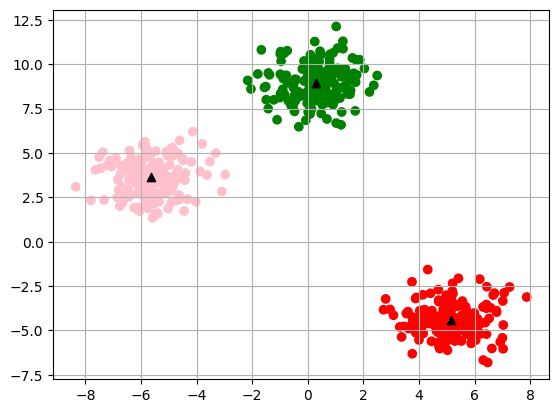

In [ ]:
clusters = assign_clusters(x, clusters)
clusters = update_clusters(x, clusters)
new_y = update_Y_cluster_through_prediction(x ,clusters)

plt.scatter(x[:,0], x[:,1], c=new_y, cmap = ListedColormap(["red", "pink", "green"]))

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^', c = 'black')
plt.grid(True)
plt.show()

#Naive_bayes: GausianNB

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Tạo dữ liệu
X, y = make_blobs(1000, 4, centers=3, random_state=2, cluster_std=1.5)

In [ ]:
print(X[:5],y[:5])

[[ -2.56558101  -4.93703238   4.14636799   1.93946775]
 [ -5.43582099  -1.51679893   4.84413861   2.08120307]
 [ -0.43835566 -10.99808749  -0.02240145  -1.07121099]
 [  1.53194501  -4.92200328  -6.63322283   3.53351475]
 [ -1.54970685 -10.087098    -1.1969814    1.88762208]] [2 2 0 1 0]


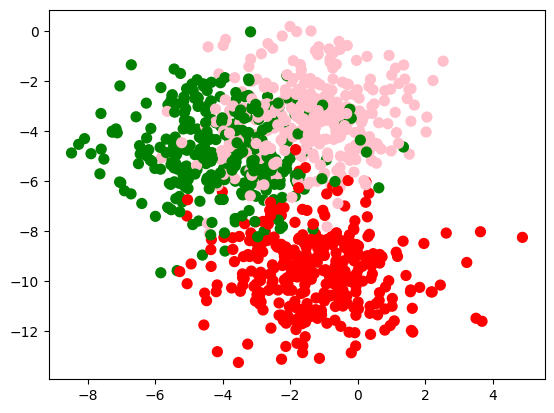

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=y, s=50, cmap = ListedColormap(["red", "pink", "green"]))

In [ ]:
model = GaussianNB()
model.fit(X,y)
predictedY = model.predict(X)
sum(y-predictedY)/len(y) #accuracy

np.float64(-0.004)

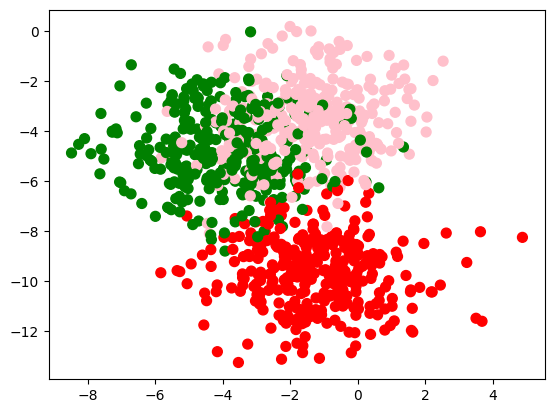

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=predictedY, s=50, cmap = ListedColormap(["red", "pink", "green"]))